# <center> **ANALISIS DE PACIENTES Y SUS PRINCIPALES CAUSAS DE AFECCIONES**








---











**INTEGRANTES:**


> **Sebastián Cárdenas Acevedo 2161062**


> **Javier David Landazabal 2151482**







In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/Proyecto IA
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/Proyecto IA
/content/drive/My Drive/Proyecto IA


### 1. Procesamiento de datos

In [0]:
d = pd.read_csv("data/AtencionMedica2016.csv")

In [178]:
d.head(5)  

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,Sintom.Resp,planific.,t.embarazo,F.U.R,zona,I.M.C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH
0,NOTA,01/01/2016 12:00:00 AM,F,A019,71.0,158.0,86,0,36.6,NaN,NaN,NaN,URGENCIAS,URGENCIAS,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,NaN,0.0,NaN,URBANO,0.0,120.0,60,80.0,98.0,SUBSIDIADO,O +
1,EVOL.,01/01/2016 12:00:00 AM,F,A019,71.0,158.0,0,0,NaN,O429,RUPTURA PREMATURA DE LAS MEMBRANAS SIN,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,NaN,4.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,O +
2,NOTA,01/01/2016 12:00:00 AM,F,A019,71.0,158.0,0,0,NaN,NaN,NaN,NaN,URGENCIAS,URGENCIAS,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,NaN,0.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,O +
3,NOTA,01/01/2016 12:00:00 AM,F,A019,71.0,158.0,0,0,NaN,NaN,NaN,NaN,HOSPITALIZACION,HOSPITALIZACION,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,NaN,0.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,O +
4,FORMU,01/01/2016 12:00:00 AM,M,A078,80.0,160.0,0,0,NaN,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,NaN,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,NaN,NaN,LE DUELE EL ESTOMAGO,NaN,NaN,0.0,NaN,URBANO,0.0,0.0,0,0.0,0.0,SUBSIDIADO,NaN


In [0]:
#filas en descripcion_del_diagnostico
d.shape;
d.descripcion_del_diagnostico.isnull().sum;



In [180]:
#filas nulas en descripcion_del_diagnostico
modDiag = d[d.descripcion_del_diagnostico.isnull()]
modDiag.shape

(55200, 32)

In [181]:
#drop filas nulas descripcion_del_diagnostico
d.drop(d[d.descripcion_del_diagnostico.isnull()].index, inplace = True)
d.shape

(72275, 32)

In [0]:
#filas en motivo_de_consulta
d.shape
d.motivo_de_consulta.isnull().sum;



In [183]:
#filas nulas en motivo_de_consulta
modMot = d[d.motivo_de_consulta.isnull()]
modMot.shape

(8820, 32)

In [184]:
#drop filas nulas
d.drop(d[d.motivo_de_consulta.isnull()].index, inplace = True)
d.shape

(63455, 32)

In [0]:
#filas en peso	
d.shape;
d.peso.isnull().sum;



In [186]:
#filas nulas en peso	
modpeso = d[d.peso	.isnull()]
modpeso.shape

(3255, 32)

In [187]:
#drop filas nulas
d.drop(d[d.peso.isnull()].index, inplace = True)
d.shape

(60200, 32)

In [0]:
#filas en sexo	
d.shape;
d.sexo.isnull().sum;



In [189]:
#filas nulas en sexo	
modSexo = d[d.sexo	.isnull()]
modSexo.shape

(0, 32)

In [190]:
#drop filas sexo
d.drop(d[d.sexo.isnull()].index, inplace = True)
d.shape

(60200, 32)

In [0]:
#reemplazamos el sexo para que nos quede como un int y no un string 
d.replace({'F': 0, 'M': 1});

In [192]:
d.head()

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,Sintom.Resp,planific.,t.embarazo,F.U.R,zona,I.M.C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH
1,EVOL.,01/01/2016 12:00:00 AM,F,A019,71.0,158.0,0,0,NaN,O429,RUPTURA PREMATURA DE LAS MEMBRANAS SIN,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,09/06/1996 12:00:00 AM,TAURAMENA,NaN,ENFERM.GENERAL,ROMPI FUENTE,NaN,NaN,4.0,NaN,URBANO,0.00,0.0,0,0.0,0.0,SUBSIDIADO,O +
4,FORMU,01/01/2016 12:00:00 AM,M,A078,80.0,160.0,0,0,NaN,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,NaN,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,NaN,NaN,LE DUELE EL ESTOMAGO,NaN,NaN,0.0,NaN,URBANO,0.00,0.0,0,0.0,0.0,SUBSIDIADO,NaN
5,H.C.,01/01/2016 12:00:00 AM,M,A078,80.0,160.0,78,19,36.4,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,LE DUELE EL ESTOMAGO,NaN,NaN,9.0,NaN,URBANO,31.25,140.0,70,93.0,98.0,SUBSIDIADO,NaN
7,FORMU,01/01/2016 12:00:00 AM,M,A057,60.0,160.0,0,0,NaN,A081,GASTROENTEROPATIA AGUDA DEBIDA AL AGENTE,NaN,URGENCIAS,URGENCIAS,CAPRESOCA EPS,10/06/1958 12:00:00 AM,TAURAMENA,NaN,NaN,TENGO DIRREA,NaN,NaN,0.0,NaN,URBANO,0.00,0.0,0,0.0,0.0,SUBSIDIADO,NaN
8,H.C.,01/01/2016 12:00:00 AM,M,A057,60.0,160.0,96,19,36.4,A081,GASTROENTEROPATIA AGUDA DEBIDA AL AGENTE,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,10/06/1958 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DIRREA,NaN,NaN,9.0,NaN,URBANO,23.44,120.0,80,93.0,98.0,SUBSIDIADO,NaN


In [0]:
#Copiar dataset
dTemp=d
dEst_sal=d
dFrec=d

In [144]:
#filas en temp		
dTemp.shape
dTemp.temp.isnull().sum()

35861

In [145]:
#filas nulas en temp	
modTemp = dTemp[dTemp.temp.isnull()]
modTemp.shape

(35861, 32)

In [146]:
#drop filas temp
dTemp.drop(dTemp[dTemp.temp.isnull()].index, inplace = True)
dTemp.shape

(24339, 32)

In [147]:
#dataset sin valores nulos en temp
dTemp.head()

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,Sintom.Resp,planific.,t.embarazo,F.U.R,zona,I.M.C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH
5,H.C.,01/01/2016 12:00:00 AM,M,A078,80.0,160.0,78,19,36.4,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,LE DUELE EL ESTOMAGO,NaN,NaN,9.0,NaN,URBANO,31.25,140.0,70,93.0,98.0,SUBSIDIADO,NaN
8,H.C.,01/01/2016 12:00:00 AM,M,A057,60.0,160.0,96,19,36.4,A081,GASTROENTEROPATIA AGUDA DEBIDA AL AGENTE,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,10/06/1958 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DIRREA,NaN,NaN,9.0,NaN,URBANO,23.44,120.0,80,93.0,98.0,SUBSIDIADO,NaN
26,H.C.,01/01/2016 12:00:00 AM,M,A028,72.0,170.0,94,20,37.0,S223,FRACTURA DE COSTILLA,VIVO,URGENCIAS,URGENCIAS,CAPRECOM,NaN,TAURAMENA,TAURAMENA,LESION AGRESION,LE PEGARON,NaN,NaN,9.0,NaN,URBANO,24.91,107.0,58,74.0,97.0,CONTRIBUTIVO,O +
28,H.C.,01/01/2016 12:00:00 AM,F,A019,47.0,170.0,104,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,12/08/1996 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DOLOR ABDOMINAL,NaN,NaN,4.0,NaN,URBANO,16.26,100.0,62,75.0,97.0,CONTRIBUTIVO,O +
31,H.C.,01/01/2016 12:00:00 AM,F,A020,74.0,177.0,88,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO SANGRADO VAGINAL,NaN,NaN,4.0,NaN,URBANO,23.62,118.0,72,87.0,97.0,CONTRIBUTIVO,O +


In [148]:
#filas en est_salida		
dEst_sal.shape
dEst_sal.est_salida.isnull().sum()

3630

In [149]:
#filas nulas est_salida		
modEst_sal = dEst_sal[dEst_sal.est_salida.isnull()]
modEst_sal.shape

(3630, 32)

In [150]:
#drop filas est_salida		
dEst_sal.drop(dEst_sal[dEst_sal.est_salida.isnull()].index, inplace = True)
dEst_sal.shape

(20709, 32)

In [151]:
#filas en frecuencia
dFrec.shape
dFrec.TebsMedia.isnull().sum()

0

In [152]:
#filas nulas est_salida		
modFrec = dFrec[dFrec.est_salida.isnull()]
modFrec.shape

(0, 32)

In [153]:
#drop filas est_salida		
dFrec.drop(dFrec[dFrec.TebsMedia.isnull()].index, inplace = True)
dFrec.shape

(20709, 32)

In [154]:
dFrec.head()

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,Sintom.Resp,planific.,t.embarazo,F.U.R,zona,I.M.C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH
5,H.C.,01/01/2016 12:00:00 AM,M,A078,80.0,160.0,78,19,36.4,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,LE DUELE EL ESTOMAGO,NaN,NaN,9.0,NaN,URBANO,31.25,140.0,70,93.0,98.0,SUBSIDIADO,NaN
8,H.C.,01/01/2016 12:00:00 AM,M,A057,60.0,160.0,96,19,36.4,A081,GASTROENTEROPATIA AGUDA DEBIDA AL AGENTE,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,10/06/1958 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DIRREA,NaN,NaN,9.0,NaN,URBANO,23.44,120.0,80,93.0,98.0,SUBSIDIADO,NaN
26,H.C.,01/01/2016 12:00:00 AM,M,A028,72.0,170.0,94,20,37.0,S223,FRACTURA DE COSTILLA,VIVO,URGENCIAS,URGENCIAS,CAPRECOM,NaN,TAURAMENA,TAURAMENA,LESION AGRESION,LE PEGARON,NaN,NaN,9.0,NaN,URBANO,24.91,107.0,58,74.0,97.0,CONTRIBUTIVO,O +
28,H.C.,01/01/2016 12:00:00 AM,F,A019,47.0,170.0,104,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,12/08/1996 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DOLOR ABDOMINAL,NaN,NaN,4.0,NaN,URBANO,16.26,100.0,62,75.0,97.0,CONTRIBUTIVO,O +
31,H.C.,01/01/2016 12:00:00 AM,F,A020,74.0,177.0,88,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO SANGRADO VAGINAL,NaN,NaN,4.0,NaN,URBANO,23.62,118.0,72,87.0,97.0,CONTRIBUTIVO,O +


In [155]:
#compruebo parametros nulos
d.descripcion_del_diagnostico.isnull().sum(),d.motivo_de_consulta.isnull().sum(),d.peso.isnull().sum(),d.sexo.isnull().sum(),d.talla.isnull().sum(),dTemp.temp.isnull().sum()

(0, 0, 0, 0, 0, 0)

In [156]:
#guardar la columna descripcion del diagnostico
labels= d.values[:,10]
print(np.unique(labels),labels.shape)

['(OSTEO)ARTROSIS PRIMARIA GENERALIZADA' 'ABDOMEN AGUDO'
 'ABORTO ESPONTANEO: COMPLETO O NO ESPECIF' ... 'VITILIGO'
 'VOMITOS DEL EMBARAZO  NO ESPECIFICADO' 'VULVITIS AGUDA'] (20709,)


In [157]:
#se modifica los strings a descripcion del diagnostico 
modificar=preprocessing.LabelEncoder()
ydiag=modificar.fit_transform(labels)
print(ydiag.shape,np.unique(ydiag))

(20709,) [   0    1    2 ... 1422 1423 1424]


In [158]:
d["descripcion_numerica"]=ydiag
d[1000:1005]

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,Sintom.Resp,planific.,t.embarazo,F.U.R,zona,I.M.C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH,descripcion_numerica
5912,H.C.,NaN,F,A039,82.0,155.0,70,20,36.9,I872,INSUFICIENCIA VENOSA (CRONICA) (PERIFERI,VIVO,CONSULTA EXTERNA,CONSULTA EXTERNA,CAPRESOCA EPS,07/12/1976 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,SE ME INFLAMAN LAS PIERNAS.,NaN,NaN,4.0,NaN,URBANO,34.13,120.0,70,87.0,97.0,SUBSIDIADO,NaN,717
5914,H.C.,NaN,F,A028,50.0,160.0,115,18,36.0,N390,INFECCION DE VIAS URINARIAS SITIO NO ES,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,09/04/1987 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO FIEBRE ME SIENTO MAL TENGO MOLESTIAS PARA,NaN,NaN,4.0,NaN,URBANO,19.53,100.0,60,73.0,98.0,SUBSIDIADO,NaN,701
5919,H.C.,NaN,F,A031,53.0,160.0,76,20,36.9,D486,TUMOR DE COMPORTAMIENTO INCIERTO O DESCO,VIVO,CONSULTA EXTERNA,CONSULTA EXTERNA,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,ME HICE UNA ECOGRAFIA MAMARIA Y TRAIGO EL RESU...,NaN,NaN,4.0,NaN,URBANO,20.70,110.0,70,83.0,97.0,SUBSIDIADO,AB+,1379
5943,H.C.,NaN,F,A032,69.0,160.0,70,20,36.9,M139,ARTRITIS NO ESPECIFICADA,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,09/09/1983 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,SE ME INFLAMA EL DEDO.,NaN,NaN,4.0,NaN,URBANO,26.95,110.0,70,83.0,97.0,SUBSIDIADO,B +,71
5970,H.C.,NaN,M,A058,89.0,170.0,78,18,36.2,N218,OTROS CALCULOS DE LAS VIAS URINARIAS INF,OBSERVAC.,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,tengo un dolor en la cintura y vomite,NaN,NaN,9.0,NaN,URBANO,30.80,140.0,80,100.0,99.0,CONTRIBUTIVO,O +,940


In [159]:
#guardar la columna descripcion del diagnostico
labels= dEst_sal.values[:,11]
print(np.unique(labels),labels.shape)


['HOSPITALIZ' 'MUERTO' 'OBSERVAC.' 'REMITIDO' 'VIVO'] (20709,)


In [160]:
#se modifica los strings a descripcion del diagnostico 
modificar=preprocessing.LabelEncoder()
yEst_sal=modificar.fit_transform(labels)
print(yEst_sal.shape,np.unique(yEst_sal))

(20709,) [0 1 2 3 4]


In [161]:
dEst_sal["est_salida_numerico"]=yEst_sal
dEst_sal[1000:1005]

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,Sintom.Resp,planific.,t.embarazo,F.U.R,zona,I.M.C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH,descripcion_numerica,est_salida_numerico
5912,H.C.,NaN,F,A039,82.0,155.0,70,20,36.9,I872,INSUFICIENCIA VENOSA (CRONICA) (PERIFERI,VIVO,CONSULTA EXTERNA,CONSULTA EXTERNA,CAPRESOCA EPS,07/12/1976 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,SE ME INFLAMAN LAS PIERNAS.,NaN,NaN,4.0,NaN,URBANO,34.13,120.0,70,87.0,97.0,SUBSIDIADO,NaN,717,4
5914,H.C.,NaN,F,A028,50.0,160.0,115,18,36.0,N390,INFECCION DE VIAS URINARIAS SITIO NO ES,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,09/04/1987 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO FIEBRE ME SIENTO MAL TENGO MOLESTIAS PARA,NaN,NaN,4.0,NaN,URBANO,19.53,100.0,60,73.0,98.0,SUBSIDIADO,NaN,701,4
5919,H.C.,NaN,F,A031,53.0,160.0,76,20,36.9,D486,TUMOR DE COMPORTAMIENTO INCIERTO O DESCO,VIVO,CONSULTA EXTERNA,CONSULTA EXTERNA,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,ME HICE UNA ECOGRAFIA MAMARIA Y TRAIGO EL RESU...,NaN,NaN,4.0,NaN,URBANO,20.70,110.0,70,83.0,97.0,SUBSIDIADO,AB+,1379,4
5943,H.C.,NaN,F,A032,69.0,160.0,70,20,36.9,M139,ARTRITIS NO ESPECIFICADA,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,09/09/1983 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,SE ME INFLAMA EL DEDO.,NaN,NaN,4.0,NaN,URBANO,26.95,110.0,70,83.0,97.0,SUBSIDIADO,B +,71,4
5970,H.C.,NaN,M,A058,89.0,170.0,78,18,36.2,N218,OTROS CALCULOS DE LAS VIAS URINARIAS INF,OBSERVAC.,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,tengo un dolor en la cintura y vomite,NaN,NaN,9.0,NaN,URBANO,30.80,140.0,80,100.0,99.0,CONTRIBUTIVO,O +,940,2


In [162]:
#guardar la columna descripcion de motivo de consulta
array= dTemp.values[:,19]   
print(np.unique(array),array.shape)



['!DOLOR DE CABEZA Y FIEBRE' '!LECTURA DE EXAMENES'
 '!LECTURA DE LA RESONANCIA' ... 'traido por bomberos'
 'valoracion especializada por embarazo gemelar'
 '�ORQUE ME DA MUCHO DOLOR DE CABEZA.'] (20709,)


In [163]:
#se modifica los strings a enteros de motivo de consulta
modificar=preprocessing.LabelEncoder()
ytemp=modificar.fit_transform(array)
print(ytemp.shape,np.unique(ytemp))

(20709,) [    0     1     2 ... 10690 10691 10692]


In [164]:
dTemp["motivos_numerico"]=ytemp
dTemp[2000:2005]

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,Sintom.Resp,planific.,t.embarazo,F.U.R,zona,I.M.C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH,descripcion_numerica,est_salida_numerico,motivos_numerico
12022,H.C.,08/02/2016 12:00:00 AM,M,A007,34.0,123.0,76,20,36.8,F981,ECOPRESIS NO ORGANICA,VIVO,CONSULTA EXTERNA,CONSULTA EXTERNA,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,PORQUE COME CUALQUIER COSA Y LE DA MALESTAR EN EL,NaN,NaN,9.0,NaN,URBANO,22.47,70.0,50,57.0,94.0,SUBSIDIADO,O +,349,4,6545
12024,H.C.,08/02/2016 12:00:00 AM,F,A051,62.0,149.0,72,16,36.3,K297,GASTRITIS NO ESPECIFICADA,VIVO,CONSULTA EXTERNA,CONSULTA EXTERNA,CAPRESOCA EPS,06/04/1964 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,DOLOR DE ESTOMAGO.,NaN,NaN,4.0,NaN,URBANO,27.93,130.0,85,100.0,0.0,SUBSIDIADO,NaN,545,4,1358
12029,H.C.,08/02/2016 12:00:00 AM,F,A052,82.5,160.0,80,16,37.0,N951,ESTADOS MENOPAUSICOS Y CLIMATERICOS FEME,VIVO,CONSULTA EXTERNA,CONSULTA EXTERNA,CAPRESOCA EPS,02/10/1963 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,ME DAN CALORES,NaN,NaN,4.0,NaN,URBANO,32.23,110.0,70,83.0,0.0,SUBSIDIADO,NaN,457,4,3538
12032,H.C.,08/02/2016 12:00:00 AM,M,A057,75.0,172.0,68,18,36.7,K297,GASTRITIS NO ESPECIFICADA,VIVO,CONSULTA EXTERNA,CONSULTA EXTERNA,CAPRESOCA EPS,03/04/1958 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,REPORTES DE EXAMENES,NaN,NaN,9.0,NaN,URBANO,25.35,115.0,75,88.0,0.0,SUBSIDIADO,NaN,545,4,7354
12034,H.C.,08/02/2016 12:00:00 AM,F,A027,60.0,154.0,122,18,37.0,J039,AMIGDALITIS AGUDA NO ESPECIFICADA,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DOLOR DE CABEZA,NaN,NaN,4.0,NaN,URBANO,25.30,128.0,72,91.0,97.0,CONTRIBUTIVO,NaN,49,4,8536


In [165]:
dFrec.head()

,docum,fecha,sexo,edad,peso,talla,fcard,fresp,temp,diagn,descripcion_del_diagnostico,est_salida,Unidad_servicio_inicial,Unid_serv_final,entidad,Fecha_nacim,Ciudad_base_de_datos,Procedencia,causa_externa,motivo_de_consulta,Sintom.Resp,planific.,t.embarazo,F.U.R,zona,I.M.C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,TIPO_DE_USUARIO,RH,descripcion_numerica,est_salida_numerico,motivos_numerico
5,H.C.,01/01/2016 12:00:00 AM,M,A078,80.0,160.0,78,19,36.4,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO OR,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,LE DUELE EL ESTOMAGO,NaN,NaN,9.0,NaN,URBANO,31.25,140.0,70,93.0,98.0,SUBSIDIADO,NaN,311,4,2782
8,H.C.,01/01/2016 12:00:00 AM,M,A057,60.0,160.0,96,19,36.4,A081,GASTROENTEROPATIA AGUDA DEBIDA AL AGENTE,VIVO,URGENCIAS,URGENCIAS,CAPRESOCA EPS,10/06/1958 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DIRREA,NaN,NaN,9.0,NaN,URBANO,23.44,120.0,80,93.0,98.0,SUBSIDIADO,NaN,549,4,8470
26,H.C.,01/01/2016 12:00:00 AM,M,A028,72.0,170.0,94,20,37.0,S223,FRACTURA DE COSTILLA,VIVO,URGENCIAS,URGENCIAS,CAPRECOM,NaN,TAURAMENA,TAURAMENA,LESION AGRESION,LE PEGARON,NaN,NaN,9.0,NaN,URBANO,24.91,107.0,58,74.0,97.0,CONTRIBUTIVO,O +,497,4,2846
28,H.C.,01/01/2016 12:00:00 AM,F,A019,47.0,170.0,104,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,12/08/1996 12:00:00 AM,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO DOLOR ABDOMINAL,NaN,NaN,4.0,NaN,URBANO,16.26,100.0,62,75.0,97.0,CONTRIBUTIVO,O +,945,4,8488
31,H.C.,01/01/2016 12:00:00 AM,F,A020,74.0,177.0,88,18,37.0,R104,OTROS DOLORES ABDOMINALES Y LOS NO ESPEC,VIVO,URGENCIAS,URGENCIAS,CAFESALUD EPS,NaN,TAURAMENA,TAURAMENA,ENFERM.GENERAL,TENGO SANGRADO VAGINAL,NaN,NaN,4.0,NaN,URBANO,23.62,118.0,72,87.0,97.0,CONTRIBUTIVO,O +,945,4,9164


In [166]:
d.describe()

,peso,talla,fcard,fresp,temp,Sintom.Resp,t.embarazo,I.M.C,Tension_Sistolica,Tension_diastolica,TebsMedia,Oximetria,descripcion_numerica,est_salida_numerico,motivos_numerico
count,20709.000000,20709.000000,20709.000000,20709.000000,20709.000000,0.0,20706.000000,20706.000000,20709.000000,20709.000000,20709.000000,20706.000000,20709.000000,20709.000000,20709.000000
mean,77.337003,155.636535,80.028731,18.375730,36.488069,NaN,5.675939,25.232413,113.163222,71.786470,85.507750,86.450739,645.173789,3.941668,4800.521995
std,495.399463,17.432650,11.522529,3.163892,1.748518,NaN,2.608843,6.636300,20.786575,13.547628,15.305021,68.897004,374.503131,0.254336,3111.224091
min,0.500000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,152.000000,74.000000,18.000000,36.400000,NaN,4.000000,21.930000,110.000000,70.000000,80.000000,94.000000,337.000000,4.000000,2121.000000
50%,64.000000,160.000000,78.000000,18.000000,36.500000,NaN,4.000000,24.800000,118.000000,70.000000,87.000000,95.000000,643.000000,4.000000,4636.000000
75%,73.000000,165.000000,85.000000,19.000000,36.800000,NaN,9.000000,28.130000,120.000000,80.000000,93.000000,98.000000,945.000000,4.000000,7426.000000
max,52400.000000,194.000000,200.000000,100.000000,40.100000,NaN,9.000000,99.000000,245.000000,200.000000,215.000000,998.000000,1424.000000,4.000000,10692.000000


In [167]:
d.columns

Index(['docum', 'fecha', 'sexo', 'edad', 'peso', 'talla', 'fcard', 'fresp',
       'temp', 'diagn', 'descripcion_del_diagnostico', 'est_salida',
       'Unidad_servicio_inicial', 'Unid_serv_final', 'entidad', 'Fecha_nacim',
       'Ciudad_base_de_datos', 'Procedencia', 'causa_externa',
       'motivo_de_consulta', 'Sintom.Resp', 'planific.', 't.embarazo', 'F.U.R',
       'zona', 'I.M.C', 'Tension_Sistolica', 'Tension_diastolica', 'TebsMedia',
       'Oximetria', 'TIPO_DE_USUARIO', 'RH', 'descripcion_numerica',
       'est_salida_numerico', 'motivos_numerico'],
      dtype='object')

# 2. Aplicacion de ML

se estimar el estado de salida para los pacientes.
Como caracteristicas se utilizaran las caracteristicas {sexo,	edad,	peso,	talla}
Se debe permutar el dataset
El 80% del dataset se utilizará como train: X_train, y_train
El 20% del dataset restante se utilizará como test: X_test, y_test

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
vals = d.values

X = vals[:, [2,4,5]]#caracteristicas= sexo(2),peso(4), talla(5)
y = vals[:,-1]      #ultima columna de "d"=descripcion_numerica (diagnostico)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

est_SVR = SVR(kernel='linear')
est_RF = RandomForestRegressor(max_depth=3, n_estimators=3)

est_SVR.fit(X_train, y_train)
est_RF.fit(X_train, y_train)
prediction_SVR = est_SVR.predict(X_test)
prediction_RF = est_RF.predict(X_test)

RMAE_SVR = np.sqrt(mean_absolute_error(prediction_SVR, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
print(RMAE_RF)
print(RMAE_SVR)

ValueError: ignored

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
vals = d.values

X = vals[:, [2,4,5]]#caracteristicas= sexo(2),peso(4), talla(5)
y = vals[:,-1]      #ultima columna de "d"=descripcion_numerica

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

est_SVR = SVR(kernel='poly')
est_RF = RandomForestRegressor(max_depth=20, n_estimators=5)

est_SVR.fit(X_train, y_train)
est_RF.fit(X_train, y_train)
prediction_SVR = est_SVR.predict(X_test)
prediction_RF = est_RF.predict(X_test)

RMAE_SVR = np.sqrt(mean_absolute_error(prediction_SVR, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
print(RMAE_RF)
print(RMAE_SVR)

52.78003066476011
51.898722569025416


In [0]:
X = vals[:, [2,4,5,6,7]]    #caracteristicas= sexo(2),peso(4), talla(5),fcard(6),fresp(7)
y = vals[:,-1]              # columna 32= Descripcion del diagnostico #ultima columna de "d"=descripcion_numerica

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

est_SVR = SVR(kernel='rbf')
est_RF = RandomForestRegressor(max_depth=3, n_estimators=3)

est_SVR.fit(X_train, y_train)
est_RF.fit(X_train, y_train)

prediction_SVR = est_SVR.predict(X_test)
prediction_RF = est_RF.predict(X_test)

RMAE_SVR = np.sqrt(mean_absolute_error(prediction_SVR, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
print(RMAE_RF)
print(RMAE_SVR)

50.446280578745245
51.70014045137142


In [0]:
X = vals[:, [2,4,5,6,7]]    #caracteristicas= sexo(2),peso(4), talla(5),fcard(6),fresp(7)
y = vals[:,-1]              # columna 32= Descripcion del diagnostico #ultima columna de "d"=descripcion_numerica

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

est_SVR = SVR(kernel='poly')
est_RF = RandomForestRegressor(max_depth=5, n_estimators=5)

est_SVR.fit(X_train, y_train)
est_RF.fit(X_train, y_train)

prediction_SVR = est_SVR.predict(X_test)
prediction_RF = est_RF.predict(X_test)

RMAE_SVR = np.sqrt(mean_absolute_error(prediction_SVR, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
print(RMAE_RF)
print(RMAE_SVR)

50.11844305073449
51.68831952716601


In [0]:
vals = dTemp.values

X = vals[:, [2,4,5,6,7,8]]    #caracteristicas= sexo(2),peso(4), talla(5),fcard(6),fresp(7),temp(8)
y = vals[:,-1]              # columna 34 dTemp= motivo_numerico
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

est_SVR = SVR(kernel='linear')
est_RF = RandomForestRegressor(max_depth=3, n_estimators=3)

est_SVR.fit(X_train, y_train)
est_RF.fit(X_train, y_train)

prediction_SVR = est_SVR.predict(X_test)
prediction_RF = est_RF.predict(X_test)

RMAE_SVR = np.sqrt(mean_absolute_error(prediction_SVR, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
print(RMAE_RF)
print(RMAE_SVR)

50.598130558958005
51.71465979343601


In [0]:
#regresorUN

vals = dFrec.values

#X = vals[:,[2,4,5,27,28]]    #caracteristicas= sexo(2),peso(4), talla(5),fcard(6),fresp(7),tensionSistolica(27),tensionDiastolica(28)
X = dFrec.values[:,[2,4,5,6,7]]  
y = dFrec.values[:,29]              # columna 29= Tension media
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

est_SVR = SVR(kernel='linear')
est_RF = RandomForestRegressor(max_depth=3, n_estimators=3)

est_SVR.fit(X_train, y_train) 
est_RF.fit(X_train, y_train)

prediction_SVR = est_SVR.predict(X_test)
prediction_RF = est_RF.predict(X_test)

RMAE_SVR = np.sqrt(mean_absolute_error(prediction_SVR, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
print(RMAE_RF)
print(RMAE_SVR)

In [0]:
#regresor

vals = dEst_sal.values

X = vals[:,[2,4,5,6,7,32]]    #caracteristicas= sexo(2),peso(4), talla(5),fcard(6),fresp(7),descripcion_numerica(32)=diagnostico
y = vals[:,-1]              # columna 32= est_salida_numerico
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

est_SVR = SVR(kernel='linear')
est_RF = RandomForestRegressor(max_depth=3, n_estimators=3)

est_SVR.fit(X_train, y_train)
est_RF.fit(X_train, y_train)

prediction_SVR = est_SVR.predict(X_test)
prediction_RF = est_RF.predict(X_test)

RMAE_SVR = np.sqrt(mean_absolute_error(prediction_SVR, y_test))
RMAE_RF = np.sqrt(mean_absolute_error(prediction_RF, y_test))
print(RMAE_RF)
print(RMAE_SVR)

49.977751669512166
51.260457746527756


# 3. Analisís de datos

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a6cc82860>,
      dtype=object)

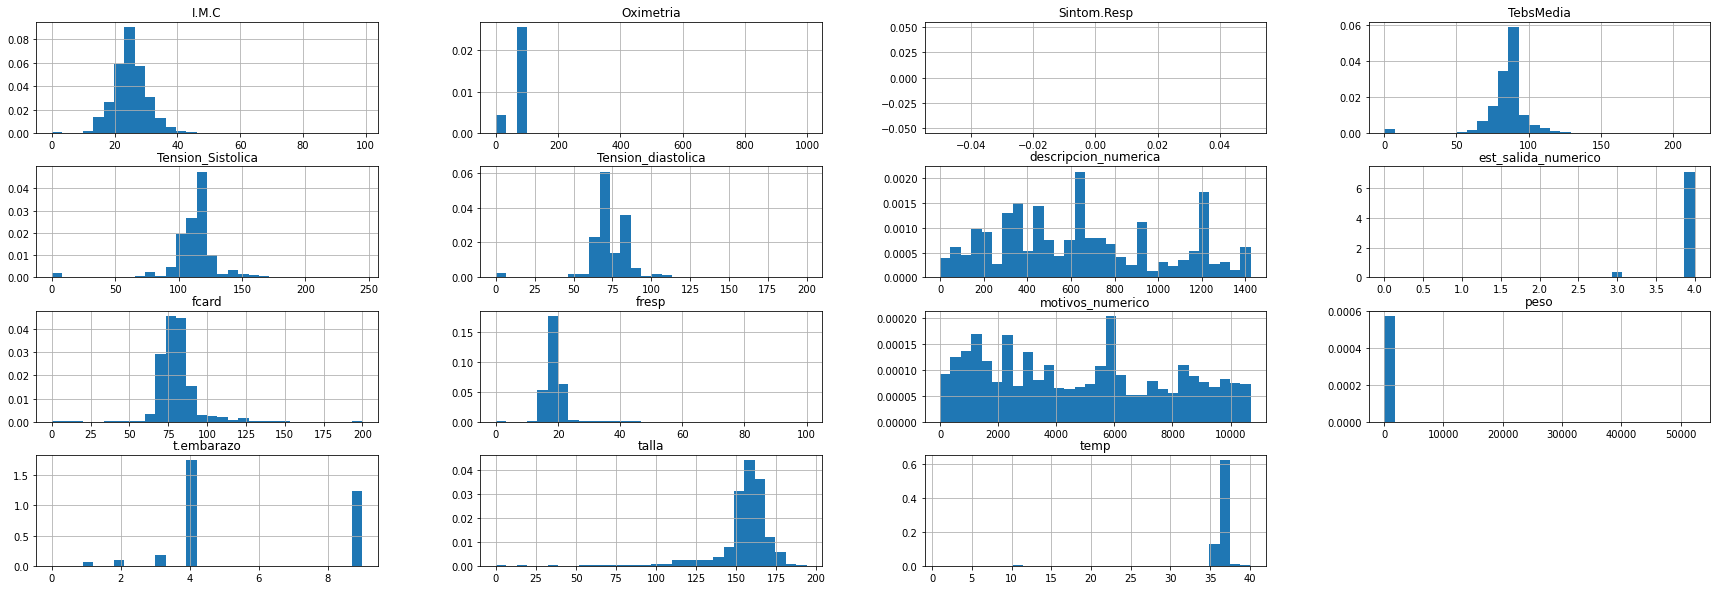

In [169]:
d.hist(bins=30,  density=True, figsize=(30,10))

In [0]:
import matplotlib.pyplot as plt

#pd.plotting.scatter_matrix(d, figsize=(10,10));


#plt.matshow(d.corr())
#plt.show()

#import pandas as pd
#import matplotlib.pyplot as plt
#plt.style.use('ggplot')

#plt.imshow(d.corr(), cmap=plt.cm.Reds, interpolation='nearest')
#plt.colorbar()
#tick_marks = [i for i in range(len(d.columns))]
#plt.xticks(tick_marks, X.columns, rotation='vertical')
#plt.yticks(tick_marks, X.columns)
#plt.show()


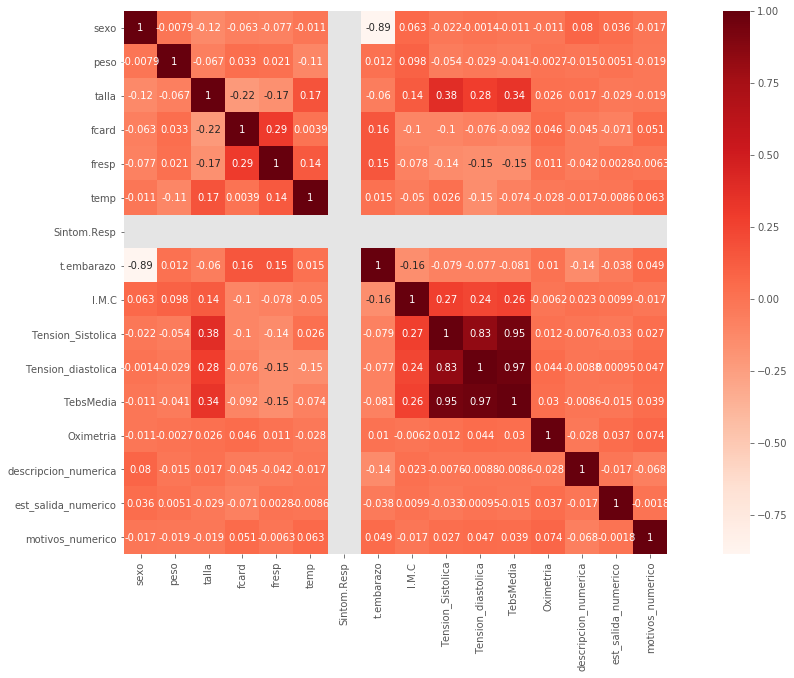

In [0]:
import seaborn as sns

plt.figure(figsize = (20,10))
sns.heatmap(d.corr(), square=True, annot=True, cmap="Reds")

#import seaborn as sns

#f, ax = plt.subplots(figsize=(10, 8))
#corr = d.corr()
#sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            #square=True, ax=ax)

In [0]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print (nfolds,)
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

In [0]:
show_curve(RandomForestRegressor())

In [0]:
show_curve(SVR())